<a href="https://colab.research.google.com/github/rochactivo-UPC/dynLAB/blob/main/P1_Din.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 Laboratorio de Dinámica
prof. Rodrigo Alva, PhD.

#1 Importar librerías necesarias:
Importar librerías necesarias: Necesitarás librerías como NumPy para manipulación de arrays, Matplotlib para gráficas, y SciPy para integración.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
import pandas as pd

#2 Cargar los datos:
Puedes subir los archivos con tus datos de señales de aceleración directamente a Colab o cargarlos desde Google Drive si los tienes almacenados allí.
Para leer los datos de aceleración utiliza, por ejemplo, numpy.loadtxt o pandas.read_csv

(archivos v09808.020 y v09808.093)

In [ ]:
# Ejemplo de carga de datos desde un archivo CSV
# Asegúrate de haber subido el archivo a tu entorno de Colab primero
file_path = '/content/v09808.020'
datos = pd.read_csv(file_path, sep='\t', header=None, names=['tiempo', 'aceleracion'])
file_path_1 = '/content/v09808.093'
datos_1 = pd.read_csv(file_path_1, sep='\t', header=None, names=['tiempo', 'aceleracion'])

Previsualizar los datos para verificar que se cargaron correctamente

In [ ]:
datos.head()

,tiempo,aceleracion
0,-0.0500,0.019667
1,-0.0499,0.044046
2,-0.0498,0.044046
3,-0.0497,0.044046
4,-0.0496,0.044046


In [ ]:
datos_1.head()

,tiempo,aceleracion
0,-0.0500,0.019284
1,-0.0499,0.173149
2,-0.0498,0.050057
3,-0.0497,-0.134581
4,-0.0496,0.050057


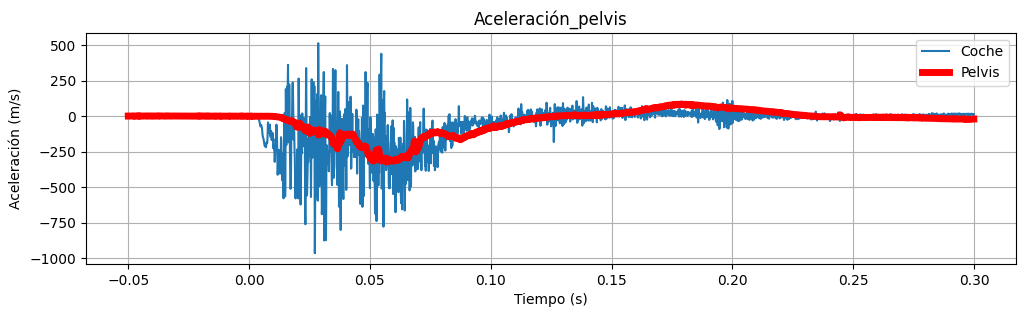

In [ ]:
# Cambiar unidades
datos['aceleracion'] = datos['aceleracion']*9.81
datos_1['aceleracion'] = datos_1['aceleracion']*9.81

# Visualizar el resultado de la integración
plt.figure(figsize=(12, 3))
plt.plot(datos_1['tiempo'], datos_1['aceleracion'], label='Coche')
plt.plot(datos['tiempo'], datos['aceleracion'], label='Pelvis', linewidth=5, color='r')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s)')
plt.title('Aceleración pelvis')
plt.grid(True)
plt.legend()
plt.show()


#4 Integración en el tiempo
Para computar a partir de los datos de aceleración la velocidad y desplazamiento hay que integrar en el tiempo.

La velocidad inicial en el momento del impacto es 56.17 km/h [= 15.60 m/s] como detalla la página (iii) del reporte en pdf, esta constante de integración debe considerarse en la primera integración


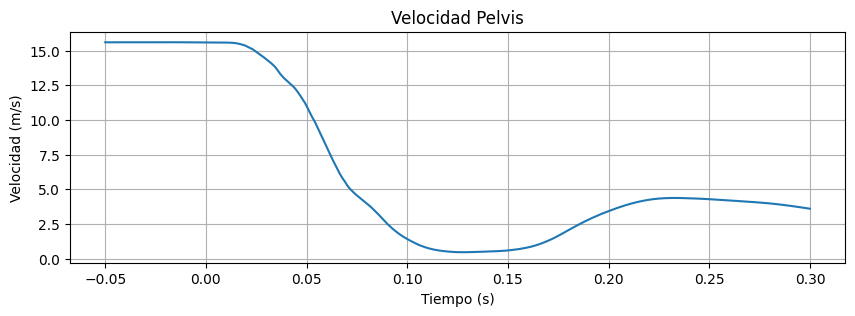

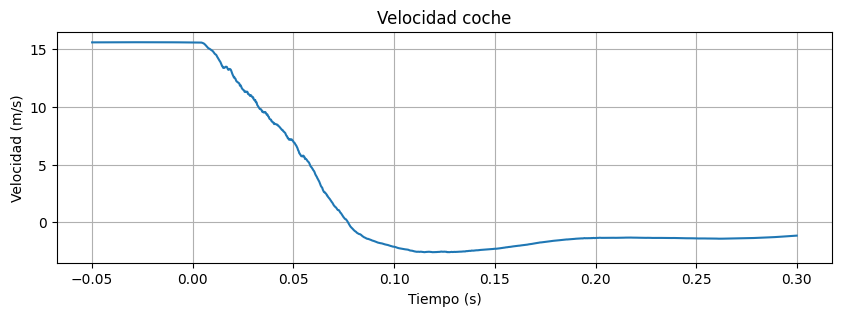

In [ ]:
velocidadInicial = 15.6 #m/s

velocidad = cumtrapz(datos['aceleracion'], datos['tiempo'], initial=0)
velocidad += velocidadInicial

velocidad_coche = cumtrapz(datos_1['aceleracion'], datos_1['tiempo'], initial=0)
velocidad_coche = velocidad_coche + velocidadInicial

# Visualizar el resultado de la integración
plt.figure(figsize=(10, 3))
plt.plot(datos['tiempo'], velocidad)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad Pelvis')
plt.grid(True)
plt.show()

# Visualizar el resultado de la integración
plt.figure(figsize=(10, 3))
plt.plot(datos_1['tiempo'], velocidad_coche)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad coche')
plt.grid(True)
plt.show()

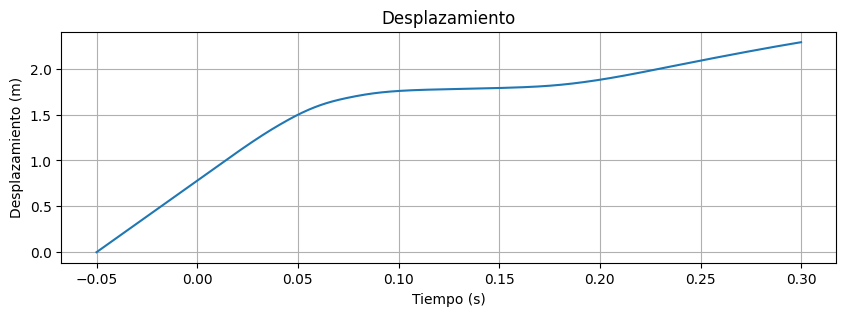

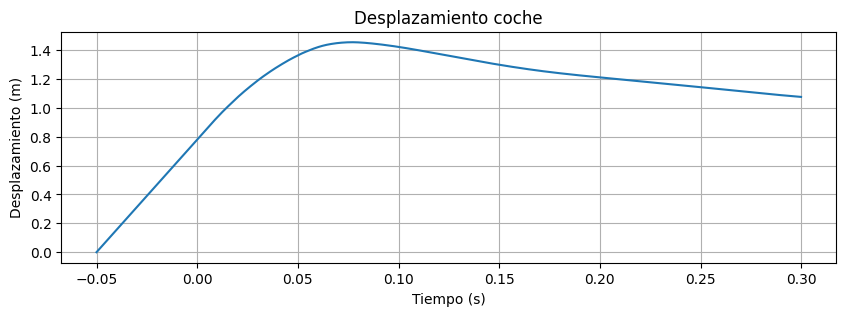

In [ ]:
desplazamiento = cumtrapz(velocidad, datos['tiempo'], initial=0)
desplazamiento_coche = cumtrapz(velocidad_coche, datos_1['tiempo'], initial=0)


# Visualizar el resultado de la integración
plt.figure(figsize=(10, 3))
plt.plot(datos['tiempo'], desplazamiento)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.title('Desplazamiento')
plt.grid(True)
plt.show()

# Visualizar el resultado de la integración
plt.figure(figsize=(10, 3))
plt.plot(datos_1['tiempo'], desplazamiento_coche)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.title('Desplazamiento coche')
plt.grid(True)
plt.show()

In [ ]:
desplazamiento_relativo = desplazamiento_coche - desplazamiento

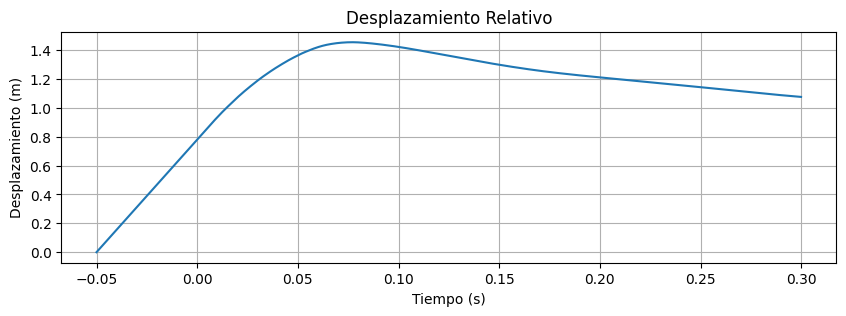

In [ ]:
# Visualizar el resultado de la integración
plt.figure(figsize=(10, 3))
plt.plot(datos_1['tiempo'], desplazamiento_coche)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento (m)')
plt.title('Desplazamiento Relativo')
plt.grid(True)
plt.show()